In [ ]:
%pip install pandas; plotly; datetime; sklearn; statsmodels

In [ ]:
pip install itertools

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import itertools as it
import statsmodels.api as sm

In [1]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [9]:
df = pd.read_excel('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/crypto_fear_greed_data.xlsx').set_index('date')
df.index = pd.to_datetime(df.index)
df

,daily_index,sentiment,weekly_mean,montly_mean
date,,,,
2023-10-23,53,Neutral,NaN,NaN
2023-10-22,53,Neutral,52.857143,NaN
2023-10-21,63,Greed,NaN,NaN
2023-10-20,53,Neutral,NaN,NaN
2023-10-19,52,Neutral,NaN,NaN
...,...,...,...,...
2018-02-05,11,Extreme Fear,NaN,NaN
2018-02-04,24,Extreme Fear,27.250000,NaN
2018-02-03,40,Fear,NaN,NaN


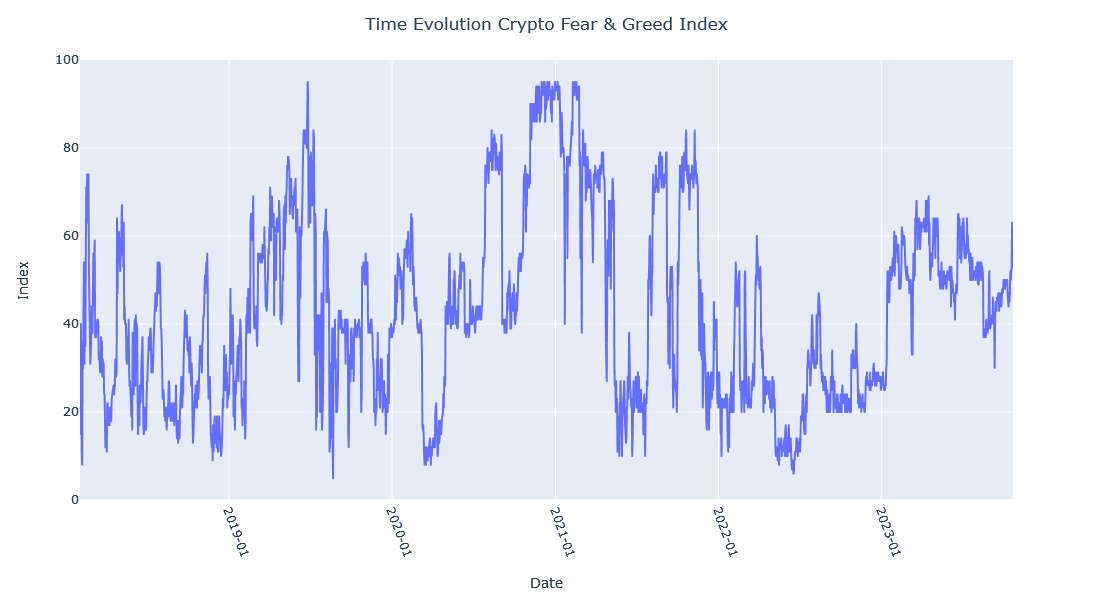

In [10]:
fig = px.line(df, x=df.index, y='daily_index', markers=False)
fig.update_layout(title='Time Evolution Crypto Fear & Greed Index', title_x=0.5, xaxis_title='Date',
                  yaxis_title='Index', width=1500, height=600, legend=dict(x=0, y=1))
fig.update_xaxes(tickangle=70, tickformat='%Y-%m')
fig.show()

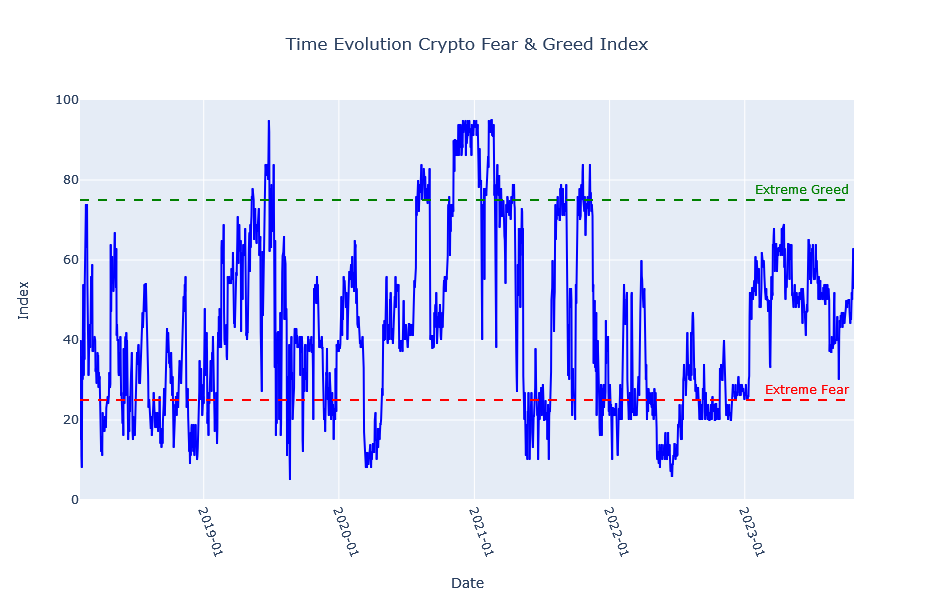

In [6]:
x = df.index
y = df['daily_index']

# create coordinate  pairs
x_pairs = it.pairwise(x)
y_pairs = it.pairwise(y)

color_mapping = {'Extreme Fear': 'red', 'Fear': 'blue', 'Neutral': 'blue', 'Greed': 'blue', 'Extreme Greed': 'green'}
colors = [color_mapping[valor] for valor in df['sentiment']]

# create base figure
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df.index, 
        y=df['daily_index'], 
        mode='lines', 
        line={'color': 'blue'}, 
        showlegend=False)
    )
# add traces (line segments)
"""for x, y, color in zip(x_pairs, y_pairs, colors):
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y, 
            mode='lines', 
            line={'color': color},
            showlegend=False
        )
    )"""
fig.add_hline(y=75, line_dash="dash",
              line_color="green",
              annotation_font={'color': 'green'},
              annotation_text="Extreme Greed", 
              annotation_position="top right"
              )
fig.add_hline(y=25, line_dash="dash",
              line_color="red",
              annotation_font={'color': 'red'},
              annotation_text="Extreme Fear", 
              annotation_position="top right"
              )
fig.update_layout(title='Time Evolution Crypto Fear & Greed Index', title_x=0.5, xaxis_title='Date',
                  yaxis_title='Index', width=1500, height=600, showlegend=True)
fig.update_xaxes(tickangle=70, tickformat='%Y-%m')

fig.show()

In [13]:
btc_d = pd.read_csv('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/BTC-USD_d.csv')[['Date', 'Adj Close']].set_index('Date').loc['2018-02-01':'2023-10-23'].pct_change().fillna(0)
btc_d.index = pd.to_datetime(btc_d.index)
df_daily = pd.concat([df['daily_index'].astype(int), btc_d.astype(float)], axis=1).dropna()

X = df_daily['daily_index']
X = sm.add_constant(X)
Y = df_daily['Adj Close']
model = sm.OLS(Y, X)
resultado = model.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.089
Date:                Sun, 05 Nov 2023   Prob (F-statistic):             0.0137
Time:                        16:35:53   Log-Likelihood:                 3973.9
No. Observations:                2087   AIC:                            -7944.
Df Residuals:                    2085   BIC:                            -7932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0027      0.002     -1.507      

In [14]:
btc_w = pd.read_csv('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/BTC-USD_w.csv')[['Date', 'Adj Close']].set_index('Date').loc['2018-02-01':'2023-10-23'].pct_change().fillna(0)
btc_w.index = pd.to_datetime(btc_w.index) - pd.Timedelta(days=1)
df_weekly = pd.concat([df['weekly_mean'].dropna().astype(int), btc_w.astype(float)], axis=1).dropna()

X = df_weekly['weekly_mean']
X = sm.add_constant(X)
Y = df_weekly['Adj Close']
model = sm.OLS(Y, X)
resultado = model.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.730
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.189
Time:                        16:35:58   Log-Likelihood:                 278.87
No. Observations:                 297   AIC:                            -553.7
Df Residuals:                     295   BIC:                            -546.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0062      0.013     -0.482      

In [16]:
btc_m = pd.read_csv('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/BTC-USD_m.csv')[['Date', 'Adj Close']].set_index('Date').loc['2018-02-01':'2023-10-23'].pct_change().fillna(0)
btc_m.index = pd.to_datetime(btc_m.index) - pd.Timedelta(days=1)
df_montly = pd.concat([df['montly_mean'].dropna().astype(int), btc_m.astype(float)], axis=1).dropna()

X = df_montly['montly_mean']
X = sm.add_constant(X)
Y = df_montly['Adj Close']
model = sm.OLS(Y, X)
resultado = model.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.534
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.116
Time:                        16:36:21   Log-Likelihood:                 10.328
No. Observations:                  68   AIC:                            -16.66
Df Residuals:                      66   BIC:                            -12.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0560      0.064     -0.877      